In [8]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import matplotlib.pyplot as plt
import numpy as np
from gensim.corpora import Dictionary

# Load dataset, split into training and testing sets.
df = pd.read_csv('Data_set_contient_12K_article.csv')
_, df = train_test_split(df, test_size=0.3, random_state=42)
my_docs = df['Article'].tolist()

# Preprocess documents, tokenize text, create bigrams, and prepare corpus and dictionary for LDA model.
my_docs = [remove_stopwords(doc) for doc in my_docs]
tokenized_list = [simple_preprocess(doc) for doc in my_docs]
texts = [[text for text in doc.split()] for doc in my_docs]
bigram = gensim.models.Phrases(texts)
texts = [bigram[line] for line in texts]
mydict = Dictionary(texts)
mycorpus = [mydict.doc2bow(text) for text in texts]

# Train an LDA model with 10 topics and display the top words for each topic.
ldamodel = LdaModel(corpus=mycorpus, num_topics=10, id2word=mydict)
print("LDA model is : \n",ldamodel.print_topics(num_topics=10,num_words=10))
ldamodel.show_topics()


LDA model is : 
 [(0, '0.005*"The" + 0.005*"—" + 0.004*"says" + 0.003*"But" + 0.003*"like" + 0.003*"people" + 0.002*"I" + 0.002*"new" + 0.002*"In" + 0.002*"said"'), (1, '0.008*"The" + 0.007*"says" + 0.007*"—" + 0.004*"But" + 0.003*"people" + 0.003*"says." + 0.003*"I" + 0.003*"And" + 0.002*"like" + 0.002*"It"'), (2, '0.007*"The" + 0.006*"—" + 0.003*"I" + 0.003*"But" + 0.002*"people" + 0.002*"like" + 0.002*"says" + 0.002*"And" + 0.002*"it’s" + 0.001*"It"'), (3, '0.007*"The" + 0.006*"—" + 0.004*"I" + 0.003*"And" + 0.003*"says" + 0.003*"people" + 0.003*"But" + 0.002*"like" + 0.002*"U._S." + 0.002*"In"'), (4, '0.012*"The" + 0.009*"—" + 0.007*"I" + 0.006*"But" + 0.004*"And" + 0.004*"says" + 0.004*"like" + 0.003*"people" + 0.003*"said" + 0.003*"it’s"'), (5, '0.012*"—" + 0.011*"I" + 0.009*"The" + 0.005*"people" + 0.005*"But" + 0.004*"like" + 0.004*"And" + 0.003*"says" + 0.003*"He" + 0.003*"it’s"'), (6, '0.014*"The" + 0.008*"—" + 0.005*"said" + 0.004*"people" + 0.004*"says" + 0.004*"U._S." + 0.

[(0,
  '0.005*"The" + 0.005*"—" + 0.004*"says" + 0.003*"But" + 0.003*"like" + 0.003*"people" + 0.002*"I" + 0.002*"new" + 0.002*"In" + 0.002*"said"'),
 (1,
  '0.008*"The" + 0.007*"says" + 0.007*"—" + 0.004*"But" + 0.003*"people" + 0.003*"says." + 0.003*"I" + 0.003*"And" + 0.002*"like" + 0.002*"It"'),
 (2,
  '0.007*"The" + 0.006*"—" + 0.003*"I" + 0.003*"But" + 0.002*"people" + 0.002*"like" + 0.002*"says" + 0.002*"And" + 0.002*"it’s" + 0.001*"It"'),
 (3,
  '0.007*"The" + 0.006*"—" + 0.004*"I" + 0.003*"And" + 0.003*"says" + 0.003*"people" + 0.003*"But" + 0.002*"like" + 0.002*"U._S." + 0.002*"In"'),
 (4,
  '0.012*"The" + 0.009*"—" + 0.007*"I" + 0.006*"But" + 0.004*"And" + 0.004*"says" + 0.004*"like" + 0.003*"people" + 0.003*"said" + 0.003*"it’s"'),
 (5,
  '0.012*"—" + 0.011*"I" + 0.009*"The" + 0.005*"people" + 0.005*"But" + 0.004*"like" + 0.004*"And" + 0.003*"says" + 0.003*"He" + 0.003*"it’s"'),
 (6,
  '0.014*"The" + 0.008*"—" + 0.005*"said" + 0.004*"people" + 0.004*"says" + 0.004*"U._S." +

In [9]:
# Train an LSI model with 10 topics and display the top words for each topic.
from gensim.models import LsiModel

lsi_model = LsiModel(mycorpus,num_topics=10,id2word=mydict)
topics = lsi_model.print_topics(num_words=10)

for topic in topics:
    print(topic)

c:\Users\nadjib\AppData\Local\Programs\Python\Python310\lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


(0, '0.471*"—" + 0.387*"I" + 0.360*"The" + 0.203*"And" + 0.189*"people" + 0.177*"But" + 0.156*"like" + 0.140*"says" + 0.111*"it’s" + 0.107*"said"')
(1, '-0.770*"I" + 0.367*"The" + 0.228*"—" + 0.159*"says" + -0.132*"And" + -0.121*"I_think" + 0.119*"U._S." + 0.091*"Trump" + -0.083*"._.." + 0.077*"said"')
(2, '0.723*"—" + -0.348*"The" + -0.288*"says" + 0.200*"Trump" + -0.132*"says." + -0.106*"But" + -0.103*"U._S." + -0.101*"people" + -0.092*"I" + -0.064*"said"')
(3, '-0.677*"Trump" + -0.294*"said" + 0.278*"—" + 0.171*"says" + -0.148*"Trump’s" + -0.146*"U._S." + -0.134*"Clinton" + 0.098*"says." + -0.096*"campaign" + 0.083*"like"')
(4, '-0.488*"The" + 0.325*"people" + -0.317*"I" + 0.303*"And" + 0.266*"says" + 0.197*"I_think" + 0.135*"But" + 0.124*"says." + 0.122*"So" + 0.118*"it’s"')
(5, '0.415*"says" + -0.300*"And" + 0.287*"Trump" + -0.285*"The" + -0.269*"I_think" + -0.228*"U._S." + 0.186*"says." + 0.163*"He" + 0.158*"like" + 0.148*"I"')
(6, '-0.683*"U._S." + -0.285*"says" + 0.240*"The" + 

In [10]:
# Train an HDP model and display the topics.
hdpmodel = HdpModel(corpus=mycorpus, id2word=mydict)
hdpmodel.show_topics()

[(0,
  '0.009*The + 0.009*— + 0.006*I + 0.004*people + 0.004*But + 0.004*says + 0.004*And + 0.003*like + 0.003*said + 0.003*it’s + 0.002*U._S. + 0.002*In + 0.002*Trump + 0.002*He + 0.002*says. + 0.002*new + 0.002*It + 0.002*._.. + 0.002*time + 0.001*way'),
 (1,
  '0.006*— + 0.006*The + 0.004*I + 0.003*Trump + 0.003*people + 0.002*And + 0.002*But + 0.002*said + 0.002*like + 0.002*U._S. + 0.002*says + 0.001*new + 0.001*In + 0.001*It + 0.001*He + 0.001*it’s + 0.001*says. + 0.001*Springsteen + 0.001*way + 0.001*that’s'),
 (2,
  '0.006*— + 0.005*The + 0.005*I + 0.003*But + 0.003*people + 0.002*says + 0.002*like + 0.002*said + 0.002*And + 0.001*it’s + 0.001*says. + 0.001*new + 0.001*He + 0.001*It + 0.001*U._S. + 0.001*It’s + 0.001*time + 0.001*She + 0.001*In + 0.001*way'),
 (3,
  '0.004*— + 0.003*The + 0.003*says + 0.002*like + 0.002*But + 0.002*And + 0.002*He + 0.001*people + 0.001*police + 0.001*I + 0.001*._.. + 0.001*it’s + 0.001*Wilcox + 0.001*Patriots + 0.001*It + 0.001*Kidder + 0.001*k

In [12]:
import pyLDAvis.gensim
# Prepare and visualize the LDA model topics using pyLDAvis in a Jupyter notebook.
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, mycorpus, mydict)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.037893 -0.045995       1        1  23.214192
5      0.030481  0.030704       2        1  20.758918
9      0.031069 -0.005179       3        1  17.765978
4      0.029383  0.004537       4        1  16.024682
8      0.010441  0.036839       5        1  10.003810
1     -0.004790 -0.005451       6        1   6.439406
7      0.003577 -0.006005       7        1   5.005477
0     -0.045606 -0.005053       8        1   0.400626
3     -0.042753 -0.000525       9        1   0.274254
2     -0.049695 -0.003871      10        1   0.112656, topic_info=     Term          Freq         Total Category  logprob  loglift
65    The  14540.000000  14540.000000  Default  30.0000  30.0000
308     —  14111.000000  14111.000000  Default  29.0000  29.0000
729     I   8323.000000   8323.000000  Default  28.0000  28.0000
225  says   5973.000000   5973.000000  Default  27.0000  27.0000
19    But   6030.000000   6030.000000  Default  26.0000  26.0000
..    ...           ...           ...      ...      ...      ...
689   use      1.146965   1186.377836  Topic10  -7.2768  -0.1530
994  This      1.203521   1393.508472  Topic10  -7.2286  -0.2657
274  told      1.200862   1445.674446  Topic10  -7.2308  -0.3047
321  ”The      1.195881   1713.741631  Topic10  -7.2350  -0.4790
752  They      1.134517   1780.688758  Topic10  -7.2877  -0.5700

[858 rows x 6 columns], token_table=        Topic      Freq          Term
term                                 
49862       1  0.247462   $13_million
49862       6  0.494925   $13_million
107353      4  0.919341  $185_million
43492       1  0.138886           (3)
43492       2  0.833316           (3)
...       ...       ...           ...
321         7  0.033844          ”The
321         8  0.002334          ”The
321         9  0.001751          ”The
321        10  0.000584          ”The
60809       4  0.733866         ”read

[2366 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 10, 5, 9, 2, 8, 1, 4, 3])

In [14]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(hdpmodel, mycorpus, mydict)

PreparedData(topic_coordinates=              x         y  topics  cluster          Freq
topic                                                   
0      0.308253 -0.003167       1        1  8.278185e+01
1      0.216312  0.045309       2        1  1.886688e+00
2      0.210339 -0.063371       3        1  1.674143e+00
3      0.115585  0.105144       4        1  7.627438e-01
5      0.094245 -0.010834       5        1  6.588451e-01
...         ...       ...     ...      ...           ...
143   -0.031545 -0.001493     146        1  1.656112e-13
144   -0.031991  0.000195     147        1  8.281959e-14
147   -0.030855  0.002199     148        1  1.036121e-14
149   -0.031622 -0.000722     149        1  5.178857e-15
148   -0.031700 -0.001704     150        1  5.178855e-15

[150 rows x 5 columns], topic_info=            Term          Freq         Total  Category  logprob  loglift
65           The  1.206000e+04  12060.000000   Default  30.0000  30.0000
308            —  1.204800e+04  12048.000000   Default  29.0000  29.0000
729            I  7.227000e+03   7227.000000   Default  28.0000  28.0000
194       people  5.314000e+03   5314.000000   Default  27.0000  27.0000
225         says  5.132000e+03   5132.000000   Default  26.0000  26.0000
...          ...           ...           ...       ...      ...      ...
16486     Guzman  3.810136e-15      9.527924  Topic150  -9.9042   2.0440
4459    minority  3.864592e-15     67.679048  Topic150  -9.8900   0.0977
12713        Kim  3.844326e-15     51.465470  Topic150  -9.8953   0.3663
805    election,  3.783449e-15    121.772520  Topic150  -9.9113  -0.5109
39700       dual  3.690777e-15     13.746905  Topic150  -9.9360   1.6456

[10044 rows x 6 columns], token_table=        Topic      Freq              Term
term                                     
28516       6  0.558610         #SoWhite.
65556       1  0.775899  #ThanksForTyping
48319      11  0.517881     #allmalepanel
81028       1  0.453368     #itwisewords)
75672       1  0.811604              $12.
...       ...       ...               ...
91949       1  0.496818         ”whatever
140977      1  0.496343          ”worried
130624      1  0.466440            ”youse
141936      1  0.482176             ”zwei
106701      1  0.476508                 ⚄

[13710 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 6, 5, 10, 7, 9, 13, 8, 11, 12, 23, 16, 18, 14, 15, 19, 20, 17, 22, 21, 27, 26, 25, 29, 35, 30, 24, 32, 28, 41, 33, 31, 37, 42, 36, 34, 39, 44, 38, 54, 46, 48, 47, 45, 52, 50, 40, 43, 57, 51, 70, 53, 78, 62, 49, 61, 65, 67, 55, 56, 59, 80, 69, 73, 76, 63, 58, 77, 64, 86, 60, 85, 74, 66, 68, 75, 72, 71, 82, 90, 94, 95, 81, 93, 88, 84, 79, 83, 91, 105, 89, 92, 96, 87, 98, 100, 97, 103, 101, 99, 104, 115, 102, 111, 126, 107, 130, 110, 106, 109, 108, 132, 147, 127, 112, 120, 114, 146, 113, 116, 117, 118, 119, 121, 122, 123, 124, 125, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 148, 150, 149])

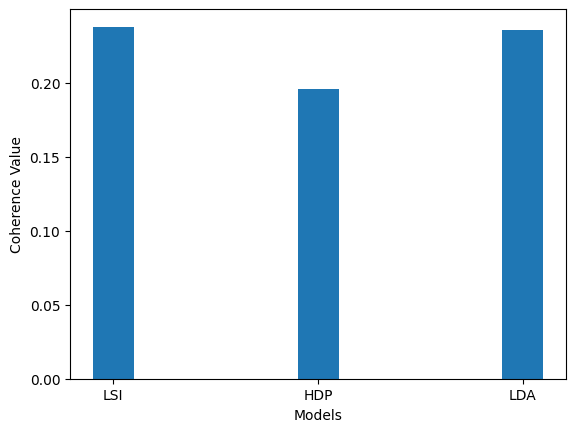

In [15]:
# Compute coherence scores for LSI, HDP, and LDA models and visualize them with a bar graph.
lsitopics = [[word for word, prob in topic] for topicid, topic in lsi_model.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=mydict, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=mydict, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=mydict, window_size=10).get_coherence()

def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                ['LSI', 'HDP', 'LDA'])
plt.show()